In [1]:
from objetos import *
from function import *
import pandas as pd 
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [6]:
list_comp,attributos_=readFile(excel_file='Teste.xlsx')

Component created named motor
Component created named fan
Component created named heater
Component created named nozzle
Component created named body
Atribute named geometry linked to motor
Atribute named material linked to motor
Atribute named power linked to motor
Atribute named temperature linked to motor
Atribute named geometry linked to fan
Atribute named rot.speed linked to fan
Atribute named material linked to fan
Atribute named power linked to fan
Atribute named geometry linked to heater
Atribute named material linked to heater
Atribute named power linked to heater
Atribute named temperature linked to heater
Atribute named geometry linked to nozzle
Atribute named material linked to nozzle
Atribute named temperature linked to nozzle
Atribute named geometry linked to body
Atribute named material linked to body


In [8]:
links=createMatrix(attributes_list=attributos_)
links.shape

(17, 17, 2)

### Here there are 2 options:
- Generate random conections
- Generate manually connections

#### Randomly

In [9]:
createLinksRandom(matrix=links,attributes_list=attributos_)

array([[[  0,   0],
        [ 99,   5],
        [  5,   4],
        [ 46,   3],
        [ 34,   2],
        [  0,   0],
        [ 20,   5],
        [ 33,   2],
        [  0,   0],
        [ 33,   4],
        [ 16,   3],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  5,   4],
        [  0,   0],
        [  0,   0]],

       [[ 99,   5],
        [  0,   0],
        [  0,   0],
        [ 94,   4],
        [  0,   0],
        [ 33,   5],
        [  0,   0],
        [  0,   0],
        [ 39,   1],
        [  0,   0],
        [  7,   2],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [ 92,   5]],

       [[  5,   4],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [ 61,   4],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   

#### Manually

In [4]:
createLink(matrix=links,attribute1=attributos_[0], attribute2=attributos_[1],attribute_list=attributos_, time=1, risk=50 )
createLink(matrix=links,attribute1=attributos_[2], attribute2=attributos_[3],attribute_list=attributos_, time=2, risk=100 )
createLink(matrix=links,attribute1=attributos_[4], attribute2=attributos_[5],attribute_list=attributos_, time=2, risk=100 )
createLink(matrix=links,attribute1=attributos_[6], attribute2=attributos_[7],attribute_list=attributos_, time=1, risk=50 )
createLink(matrix=links,attribute1=attributos_[8], attribute2=attributos_[9],attribute_list=attributos_, time=2, risk=100 )
createLink(matrix=links,attribute1=attributos_[10], attribute2=attributos_[11],attribute_list=attributos_, time=2, risk=100 )
createLink(matrix=links,attribute1=attributos_[12], attribute2=attributos_[13],attribute_list=attributos_, time=1, risk=50 )
createLink(matrix=links,attribute1=attributos_[14], attribute2=attributos_[15],attribute_list=attributos_, time=2, risk=100 )
createLink(matrix=links,attribute1=attributos_[16], attribute2=attributos_[1],attribute_list=attributos_, time=2, risk=100 )
createLink(matrix=links,attribute1=attributos_[0], attribute2=attributos_[15],attribute_list=attributos_, time=1, risk=50 )
createLink(matrix=links,attribute1=attributos_[1], attribute2=attributos_[12],attribute_list=attributos_, time=2, risk=100 )
createLink(matrix=links,attribute1=attributos_[1], attribute2=attributos_[4],attribute_list=attributos_, time=2, risk=100 )
links

array([[[  0,   0],
        [ 50,   1],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [ 50,   1],
        [  0,   0]],

       [[ 50,   1],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [100,   2],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [100,   2],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [100,   2]],

       [[  0,   0],
        [  0,   0],
        [  0,   0],
        [100,   2],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   0],
        [  0,   

## Creating Stop Conditions


In [10]:
Mov=Behaviour(name="Movement")
Mov.addCondition(attributos_[1])
Mov.addCondition(attributos_[2])
Mov.addCondition(attributos_[0])

Inf_Iteraction= Behaviour(name="teste")
behavi=[Mov,Inf_Iteraction]

Behaviour created named Movement
Created a condtion that material has to work for  Movement to continue working
Created a condtion that power has to work for  Movement to continue working
Created a condtion that geometry has to work for  Movement to continue working
Behaviour created named teste


In [ ]:
State_machine(components=list_comp,behaviour=behavi,link_matrix=links,attrs= attributos_,number_of_interaction=500)

In [12]:
df= analysis(path='Simulations/Simulation_6_12_2023_13_37/Analysis/')

In [13]:
result=countFailureMode(df=df)
result

,Attribute.Component,Mean Tick to Fail,power.fan,temperature.heater,material.fan,geometry.motor,temperature.motor,geometry.body,geometry.heater,rot.speed.fan,material.nozzle,power.heater,geometry.fan,material.heater,power.motor,material.motor,geometry.nozzle,temperature.nozzle,material.body
0,geometry.body,4.179832,0,269,0,0,0,132,0,0,99,0,0,0,0,0,34,0,61
1,geometry.fan,3.273308,44,0,74,160,0,0,22,0,0,104,361,0,0,0,18,0,0
2,geometry.heater,4.479037,87,0,143,0,158,0,0,0,0,195,142,0,93,139,0,0,164
3,geometry.motor,3.509360,152,0,36,364,151,0,0,0,0,64,149,52,10,30,0,7,0
4,geometry.nozzle,3.609473,266,41,55,0,317,35,0,0,0,0,26,0,0,0,133,74,172
5,material.body,3.795019,263,184,33,0,148,77,63,20,166,0,0,93,0,31,151,72,265
6,material.fan,3.613718,0,0,328,33,0,0,26,0,25,0,77,0,0,0,47,0,18
7,material.heater,3.314159,0,0,0,69,0,0,0,0,0,0,0,511,0,0,0,47,51
8,material.motor,4.540830,0,0,0,94,151,0,112,68,0,50,0,0,0,245,0,0,27
9,material.nozzle,3.189412,0,0,41,0,0,65,0,223,15,280,0,0,0,0,0,17,209


Right now, think about other analysis:
- Graphos with color code
- Heatmap 



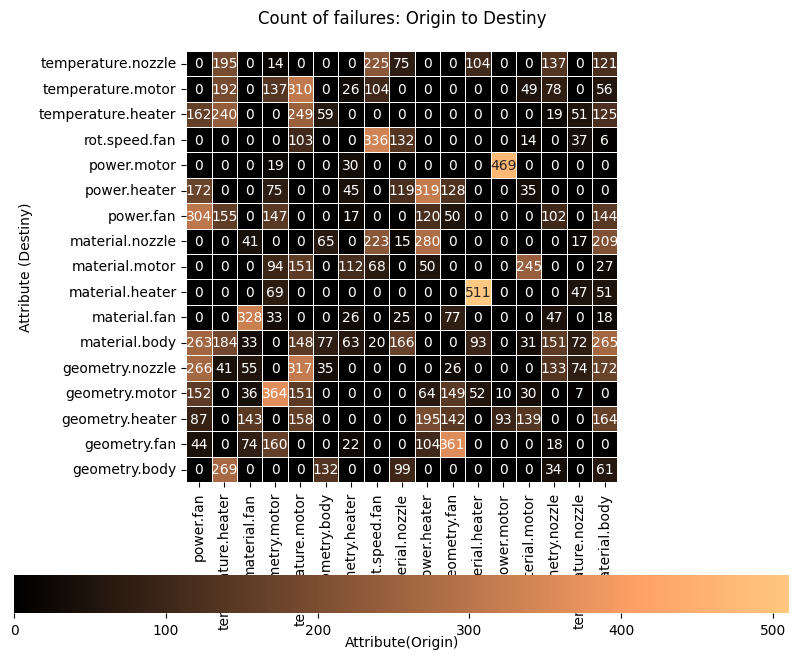

In [14]:
plot_heatmap(count_values=result)

In [16]:
rd.randint(0,10)

0